In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [42]:
def apply_lda_one_component(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    lda = LDA(n_components=1)
    X_lda = lda.fit_transform(X_scaled, y)

    explained_df = pd.DataFrame({
        'Linear Discriminant': ['LD1'],
        'Explained Variance Ratio': [round(lda.explained_variance_ratio_[0], 4)]
    })

    return X_lda, explained_df, lda

In [43]:
def evaluate_classifiers(X, y):
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVM Linear': SVC(kernel='linear'),
        'SVM RBF': SVC(kernel='rbf'),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    x_train, x_test, y_train, y_test = train_test_split(indep_x, dep_y, test_size=0.2, random_state=42)

    results = []
    for name, model in classifiers.items():
        model.fit(x_train, y_train)
        acc = accuracy_score(y_test, model.predict(x_test))
        results.append({'Classifier': name, 'Accuracy': round(acc, 4)})

    return pd.DataFrame(results)

In [44]:
dataset1 = pd.read_csv("CKD.csv",index_col=None)

In [45]:
df2=dataset1

In [46]:
df2=pd.get_dummies(df2,drop_first=True)

df2=dataset1

df2=pd.get_dummies(df2,drop_first=True)

In [47]:
X = df2.drop('classification_yes',1)
y = df2['classification_yes']

In [48]:
def run_lda_one_component_pipeline(df):
    #X = df2.drop('classification_yes',1)
    #y = df2['classification_yes']
    
    X_train_lda, explained_df, lda_model = apply_lda_one_component(X, y)
    plot_lda_1d(X_train_lda, y)
    accuracy_df = evaluate_classifiers(X_train_lda, y)
    return explained_df, accuracy_df

In [49]:
def plot_lda_1d(X_train_lda, dep_y):
    lda_df = pd.DataFrame(X_train_lda, columns=['LD1'])
    lda_df['classification_yes'] = dep_y.values

    plt.figure(figsize=(8, 4))
    sns.histplot(data=lda_df, x='LD1', hue='classification_yes', kde=True, element='step', stat='density', common_norm=False)
    plt.title('LDA of CKD Dataset (1 Component)')
    plt.xlabel('Linear Discriminant 1')
    plt.tight_layout()
    plt.show()

In [50]:
X = df2.drop('classification_yes',1)
y = df2['classification_yes']

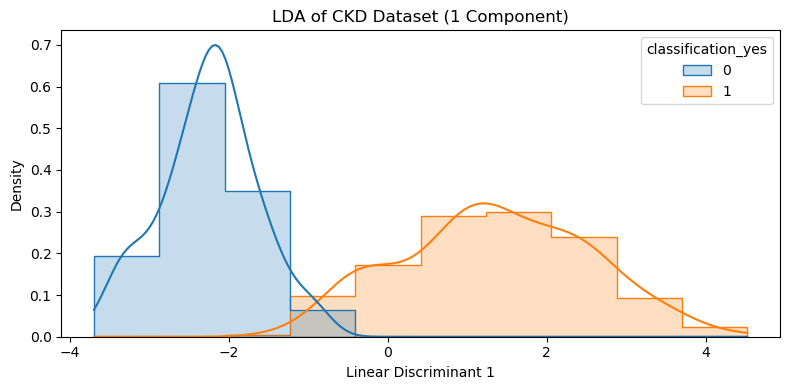


 Explained Variance:
  Linear Discriminant  Explained Variance Ratio
0                 LD1                       1.0

 Classifier Accuracy on 1D LDA Data:
            Classifier  Accuracy
0  Logistic Regression    1.0000
1           SVM Linear    0.9875
2              SVM RBF    0.5125
3        Decision Tree    0.9750
4        Random Forest    1.0000


In [51]:
explained_df, accuracy_df = run_lda_one_component_pipeline(df2)

print("\n Explained Variance:")
print(explained_df)

print("\n Classifier Accuracy on 1D LDA Data:")
print(accuracy_df)